1. Napisz funkcję f(x, y), która liczy średnią liczb od 1 do x ze skokiem y. Uruchom tę funkcję dla x=numeryczna_część_numeru_indeksu i y=1/numeryczna_część_numeru_indeksu

In [4]:
using Statistics
f(x,y) = mean(1:y:x);
f(107432,1/107432)

53716.5

2. Wylosuj 1000 liczb ze standardowego rozkładu normalnego. Narysuj ich histogram

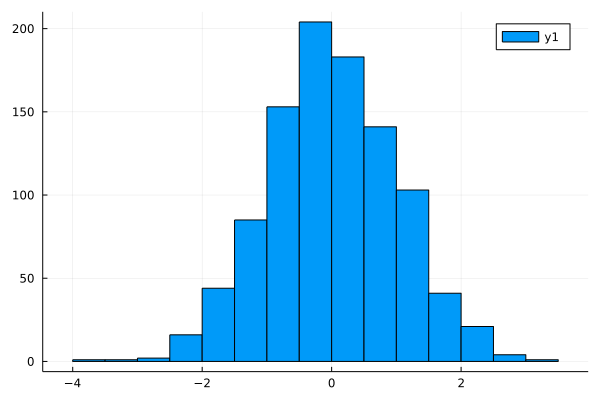

In [15]:
using Plots
x = randn(1000)
y = randexp(1000)
z = randcycle(1000)
histogram(x)

3. Wylosuj 20 liczb z rozkładu jednostajnego na przedziale [0,1]. Wyznacz 95% przedział ufnośi dla średniej tych liczb dla 10000 powtórzeń próby bootstrapowej

In [26]:
using Statistics
x = rand(20); 
x = x .* 2 .+ 1;  
boot = [mean(rand(x,20)) for _ in 1:10000]

quantile(boot, [0.025, 0.975])

2-element Array{Float64,1}:
 1.7255043668220988
 2.284996346278307

4. Biorąc przykład z zadania 3 napisz funkcję, której parametrem będzie wielkośc próby n a wynikiem szerokość przedziału ufności. Narysuj wykres zależności szerokości przedziału ufności od n, gdzien przyjmuje wartości od 10 do 100 krokiem 1. 

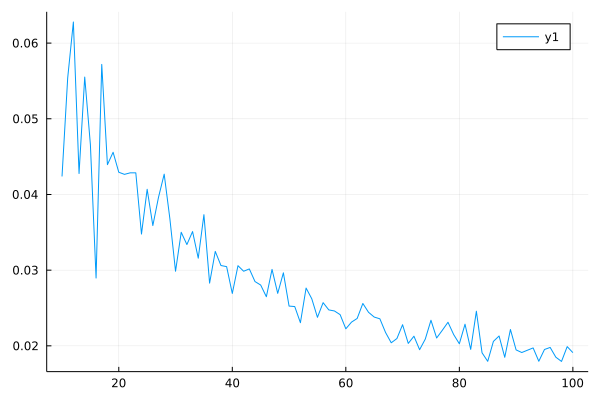

In [28]:
using Statistics
using Plots 

function f(n)
    x = rand(n)
    boot = [mean(rand(x, n)) for _ in 1:10000]
    q = quantile(boot, [0.025, 0.0975])
    return q[2] - q[1]
end

plot(10:100, f.(10:100))

5. Prowadzisz eksperyment, który zwraca 1 lub 0 jako wynik (np. klient kupił lub nie kupił produktu). Oblicz ile pomiarów należy wykonać, aby oszacować prawdopodobieństwo sukcesu z dokładnością +/- 0.05 z prawdopodobieństwem 95%. Sprawdź symulacyjnie, czy wyliczona wartość jest prawidłowa.

In [29]:
res = quantile([mean(rand(Bool, 400)) for i in 1:10000], [0.025, 0.975])
res[2] - res[1]

0.09499999999999997

6. Opisz na czym polega problem exploration-exploitation w testowaniu A/B

W testowaniu A/B problem ten polega na tym, że przpeprowadzając eksperyment porównujący kilka opcji a dane mają cechę temporalna zauważamy, że system uczący musi wielokrotnie dokonywać wyboru z niepewnymi korzyściami. I teraz dylemant polea na tym czy powtarzać decyzje, które działały dobrze i dawały nawjwyższe dotychczas korzyści, to jest eksploatacja, czy podejmować nowe decyzje i uwzględniać nowe wybory niejako przedłużając eksperyment, to jest eksploracja, w celu znalezienia jeszszcze większych korzyści. 

https://towardsdatascience.com/intuition-exploration-vs-exploitation-c645a1d37c7a

7. Opisz sposób działania próbkowania Thompsona w testowaniu A/B 

W procesie poszukiwania przeprowadzamy kolejne oszacowania rozkładów nagród dla każdej opcji. Bazując na niepewnościach dostarczanych przez te rozkłady w procesie iteracyjnym pobieramy jedną próbkę każdej dystrybucji. Następnie klasyfikujemy opcje w oparciu o wartość nagród dla każdej z tych próbek i szeregujemy je w oparciu o średnią plus stała razy odchylenie standardowe. Na koniec wybierana jest opcja o najwyższej nagrodzie. W ten sposób liczymy na to, że zostaną wybrane opcje o wysokiej średniej szacowanej nagrodzie. Ten sposób próbkowania nie odrzuca pozornie najgorszych opcji i daję im szansę w dalszych każdej iteracji, jedyne co wprowadza ta metoda to to że wybór złej opcji staje się mniej prawdopodobny. 

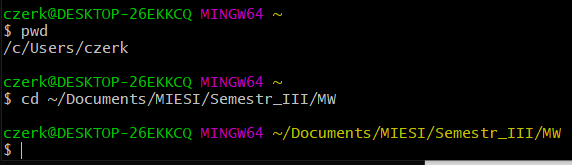

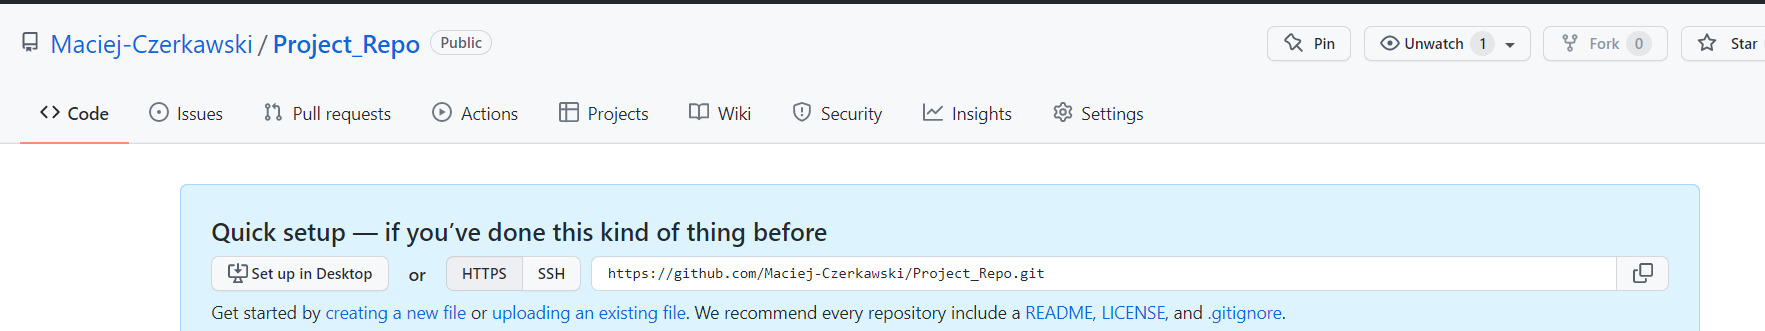

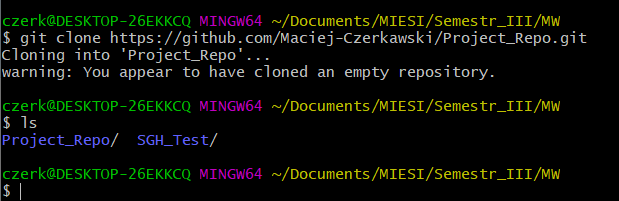

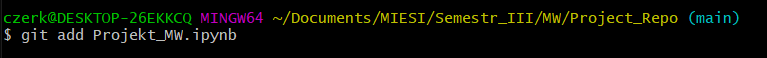

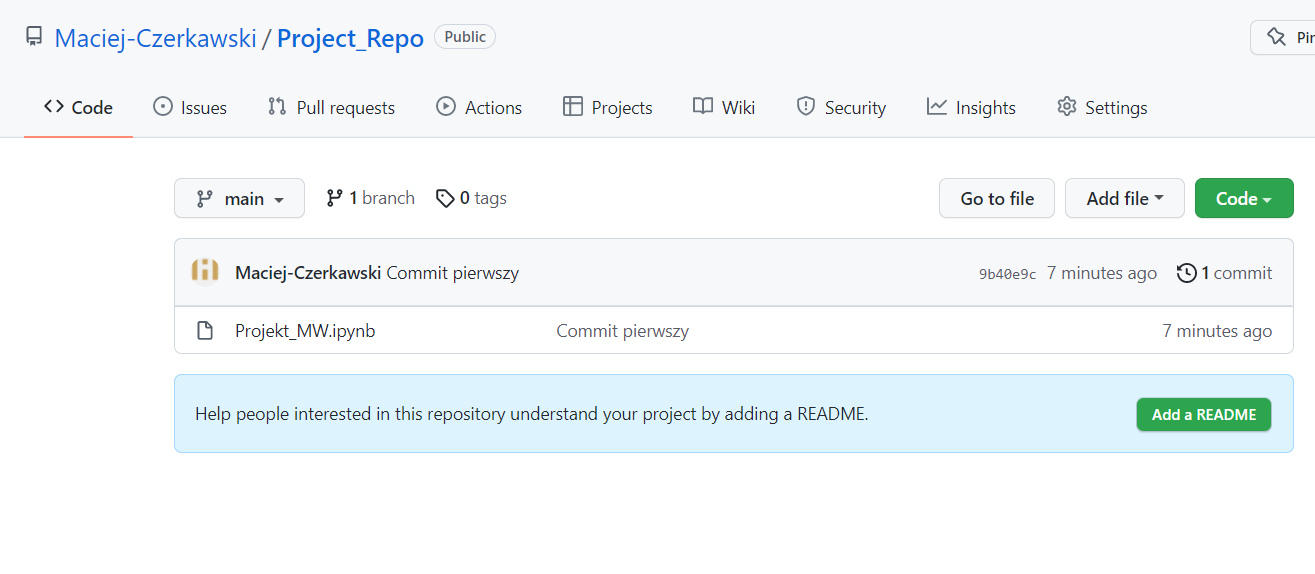

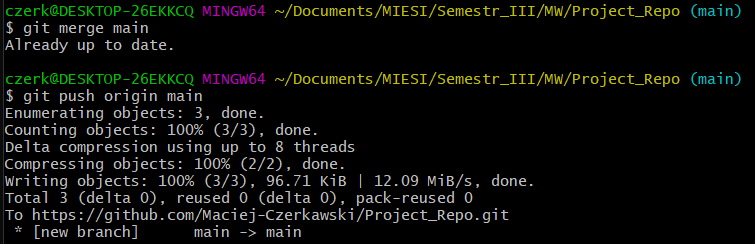

git checkout -b new-branch